### ASX 200 data viz

In [56]:
import os
import glob
import pandas as pd
import numpy as np
import scipy as sp
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory

# read csv file
asx_200_by_sector = pd.read_csv('~/Downloads/ASX200/20190301-asx200.csv', skiprows=[0])

In [57]:
asx_200_by_sector = asx_200_by_sector.loc[:,['Code', 'Company', 'Market Cap', 'Sector', 'Weight(%)']] # select colums
asx_200_by_sector.head()

,Code,Company,Market Cap,Sector,Weight(%)
0,ABP,Abacus Property Group FP Ordinary/Units Staple...,"2,093,060,000",Real Estate,0.12
1,ABC,Adelaide Brighton,"3,096,910,000",Materials,0.17
2,APT,Afterpay Touch,"4,364,610,000",Information Technology,0.25
3,AGL,AGL Energy Limited,"13,910,000,000",Utilities,0.78
4,ALQ,Als Limited,"3,835,700,000",Industrials,0.22


In [58]:
count_by_sector = asx_200_by_sector.groupby(['Sector'])['Company'].count() # group by count companies in each sector
count_by_sector.rename('Count')

Sector
Consumer Discretionary        30
Consumer Staples              14
Energy                        11
Financials                    25
Health Care                   14
Industrials                   21
Information Technology        15
Materials                     39
Real Estate                   20
Telecommunication Services     6
Utilities                      5
Name: Count, dtype: int64

### Matplotlib:

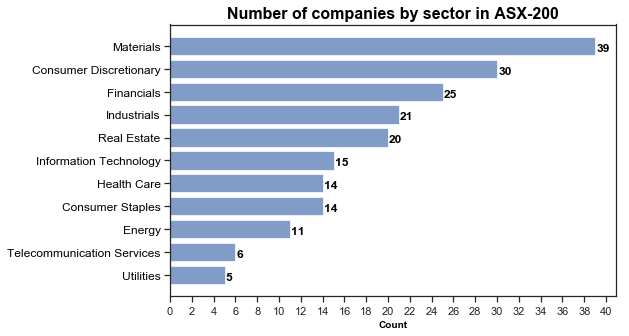

In [127]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(8, 5)) # Set size of the plot

y_pos = np.arange(len(count_by_sector)) # Returns evenly spaced values in the interval of count
counts_sorted = count_by_sector.sort_values(ascending= False) # Sort sector in descending order
for i, v in enumerate(counts_sorted):
    ax.text(v + 0.1, i + .22, str(v), color='black', fontweight='bold') # Loop and set values to the bars
opacity = 0.7
ax.barh(y_pos, counts_sorted, align='center', alpha = opacity,
        ecolor='black') # Horizontal bar plot
ax.set_yticks(y_pos) # Set ticks in y-axis
ax.set_yticklabels(counts_sorted.index, fontdict= {
        'color':  'black',
        'size': 12}) # Set labels in y-axis
ax.invert_yaxis()  # Labels read top-to-bottom
ax.set_xlabel('Count', fontdict= { # Set labels in x-axis
        'color':  'black',
        'weight': 'bold',
        'size': 10})
ax.set_title('Number of companies by sector in ASX-200', fontdict= { # Set title for the plot
        'color':  'black',
        'weight': 'bold',
        'size': 16})
plt.xticks(np.arange(0, 42, step=2))
plt.savefig('matplotlib.png')
plt.show()

### Seaborn:

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



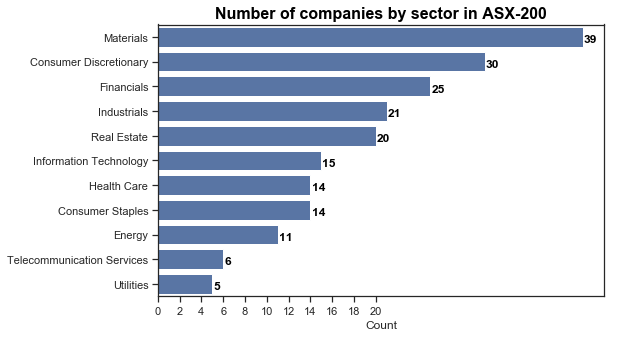

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize Figure and Axes object
fig, ax = plt.subplots(figsize=(8,5))
for i, v in enumerate(counts_sorted):
    ax.text(v + 0.1, i + .22, str(v), color='black', fontweight='bold') # Loop and set values to the bars
# Plot the total crashes
sns.barplot(y= counts_sorted.index, x= counts_sorted, data= counts_sorted, orient='h',
            order = counts_sorted.values, color="b")
sns.set_style("ticks")
ax.set_yticklabels(counts_sorted.index)
ax.set_title('Number of companies by sector in ASX-200',fontdict={# Set title for the plot
        'color':  'black',
        'weight': 'bold',
        'size': 16})
ax.set_xlabel('Count')
ax.set_ylabel('')
plt.xticks(np.arange(0, 22, step=2))
# Show plot
plt.show()

### Plotly:

In [61]:
import plotly.plotly as py
import plotly.graph_objs as go
counts_sorted = counts_sorted.sort_values(ascending=True)
data = [go.Bar(
            x= counts_sorted,
            y= counts_sorted.index,
            orientation = 'h',
    )]

layout = go.Layout(
    title = 'Forest cover (% of land area)',
    autosize=False,
    yaxis= go.layout.YAxis(
        automargin=True
    )
)
fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename='basic-bar')

### Read ASX 200 stock price data:

In [62]:
# Read share prices data

# read 2017 Jan - June
path = r'/Users/abishekarunachalam/Downloads/ASX200/2017Jan-June/' # path to folder
all_files = glob.glob(path + "/*.txt")

li = []

for filename in all_files:
    df = pd.read_csv(filename, names= ['Code','Date','Open','High', 'Low', 'Close', 'Volume'])
    li.append(df)

asx_200_2017_1 = pd.concat(li, axis=0, sort=True)

# read 2017 July - Dec
path = r'/Users/abishekarunachalam/Downloads/ASX200/2017july-december/' # path to folder
all_files = glob.glob(path + "/*.txt")

li = []

for filename in all_files:
    df = pd.read_csv(filename, names= ['Code','Date','Open','High', 'Low', 'Close', 'Volume'])
    li.append(df)

asx_200_2017_2 = pd.concat(li, axis=0, sort=True)

# read 2018 Jan - June
path = r'/Users/abishekarunachalam/Downloads/ASX200/2018jan-june/' # path to folder
all_files = glob.glob(path + "/*.txt")

li = []

for filename in all_files:
    df = pd.read_csv(filename, names= ['Code','Date','Open','High', 'Low', 'Close', 'Volume'])
    li.append(df)

asx_200_2018_1 = pd.concat(li, axis=0, sort=True)

# read 2018 July - Dec
path = r'/Users/abishekarunachalam/Downloads/ASX200/2018july-dec/' # path to folder
all_files = glob.glob(path + "/*.txt")

li = []

for filename in all_files:
    df = pd.read_csv(filename, names= ['Code','Date','Open','High', 'Low', 'Close', 'Volume'])
    li.append(df)

asx_200_2018_2 = pd.concat(li, axis=0, sort=True)

# read 2019 Jan
path = r'/Users/abishekarunachalam/Downloads/ASX200/2019jan/' # path to folder
all_files = glob.glob(path + "/*.txt")

li = []

for filename in all_files:
    df = pd.read_csv(filename, names= ['Code','Date','Open','High', 'Low', 'Close', 'Volume'])
    li.append(df)

asx_200_2019jan = pd.concat(li, axis=0, sort=True)

frames = [asx_200_2017_1, asx_200_2017_2, asx_200_2018_1, asx_200_2018_2, asx_200_2019jan]
asx_200 = pd.concat(frames)

In [63]:
# Drop and close columns
asx_200 = asx_200.drop(['Open', 'Close'], axis=1)

In [64]:
# Convert to date
# asx_200['Date'] = asx_200['Date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
asx_200['Date'] = pd.to_datetime(asx_200['Date'],format= '%Y%m%d')
asx_200['Year'] = asx_200['Date'].dt.year
asx_200['Month'] = asx_200['Date'].dt.month

In [65]:
asx_200 = asx_200.sort_values(by=['Date'], ascending = True)

In [66]:
asx_200 = pd.merge(asx_200, asx_200_by_sector[['Code', 'Company', 'Market Cap', 'Sector', 'Weight(%)']], on='Code', how='inner')
asx_200 = asx_200.drop(['Year', 'Month'], axis=1)

In [67]:
def find_top_company_in_each_sector(df):
    new_df = pd.DataFrame(columns=['Code', 'Date', 'High', 'Low', 'Volume', 'Company', 'Market Cap', 'Sector', 'Weight(%)'])
    sectors = df['Sector'].unique()
    for sector in sectors:
        sector_df = df.loc[df['Sector'] == sector]
        max_in_each_company = sector_df.groupby(['Code'],as_index=False)['High'].max()
        max_in_each_company = max_in_each_company.sort_values(ascending=False, by='High')
        filtered_df = df.loc[df['Code'] == (max_in_each_company.iloc[0].Code)]
        new_df = new_df.append(filtered_df)
    return new_df

top_company_by_sector = find_top_company_in_each_sector(asx_200)
top_company_by_sector.rename(columns={'Weight(%)':'Weight'}, inplace=True)

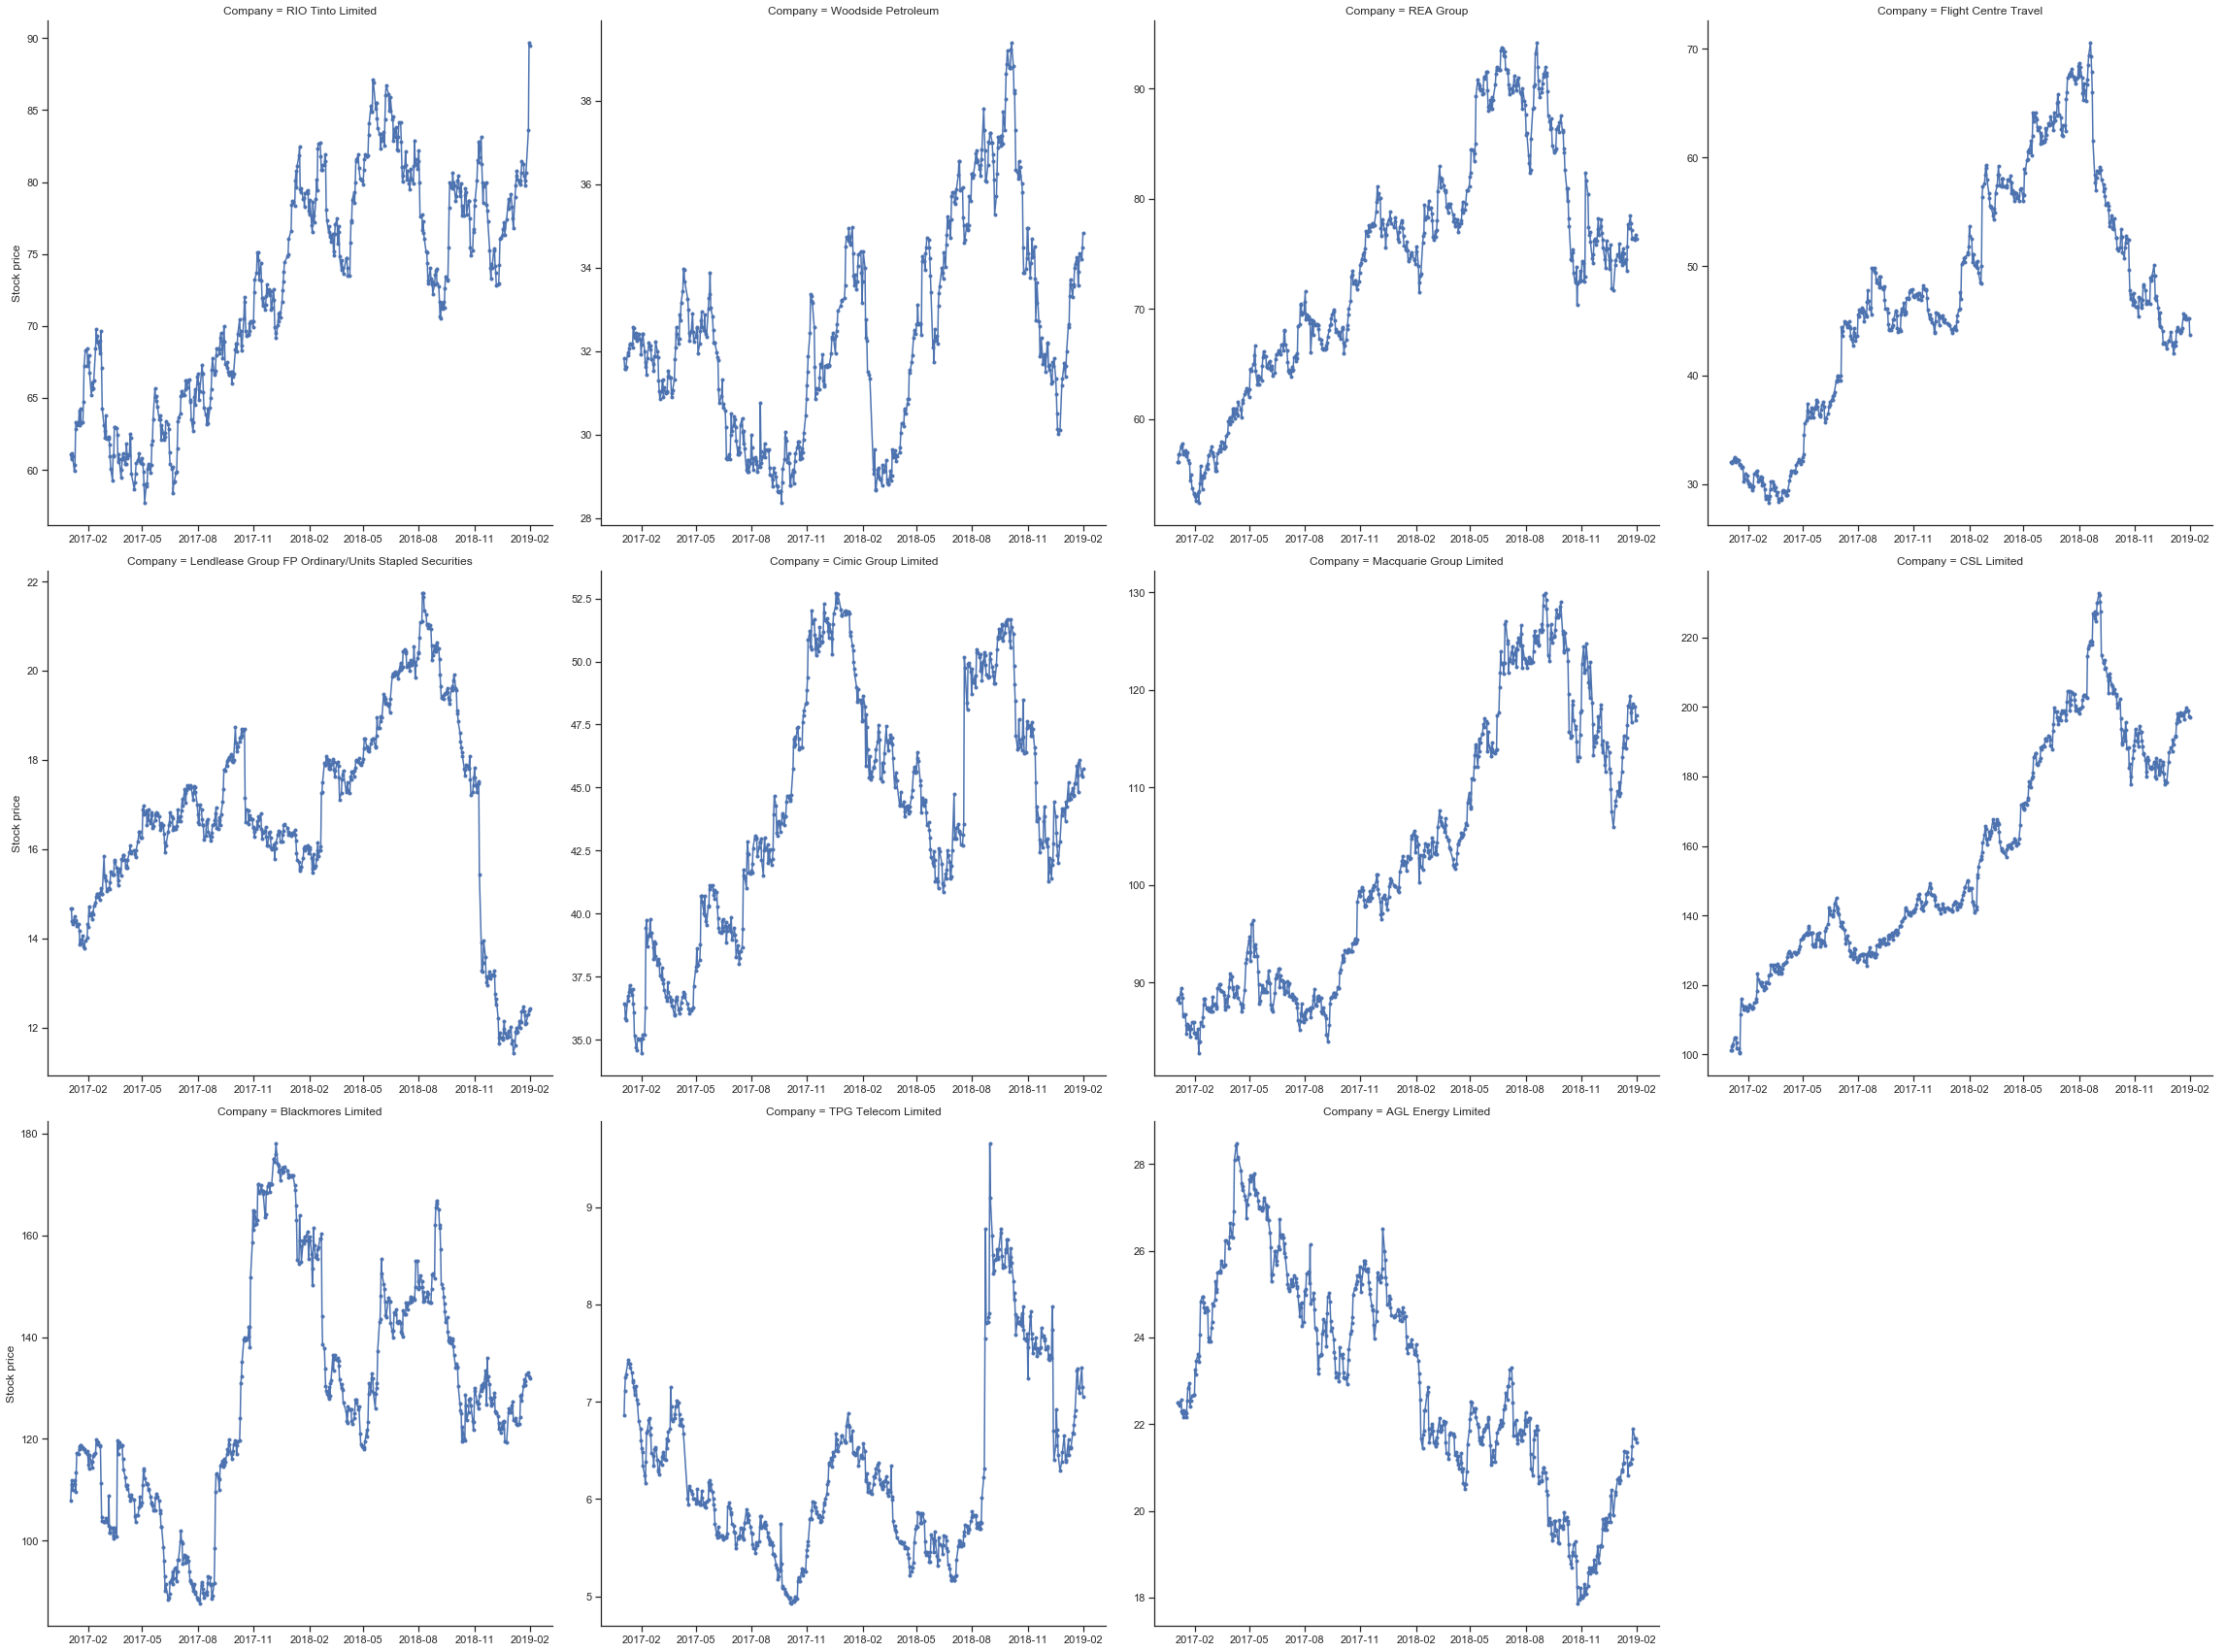

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)
g = sns.FacetGrid(top_company_by_sector, col="Company", col_wrap=4, height=8, sharey=False, sharex=False)
g = (g.map(plt.plot, "Date", "High", marker=".")
     .set_axis_labels("", "Stock price"))
ax.set_title("Graph (a)")
plt.savefig('seaborn.png')

### Plotly:

In [123]:

import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools

import numpy as np
from datetime import datetime

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=True,
                          shared_yaxes=False, vertical_spacing=0.001, subplot_titles=('Stock price', 'Volume'))


# Consumer Staples

# Line chart
stock_high_low = [2,3]
for i in stock_high_low:
    y_data = top_company_by_sector.loc[top_company_by_sector['Sector'] == 'Consumer Staples']
    if i is 2:
        plot_name = 'High'
        y_data = y_data.iloc[:,i]
    else:
        plot_name = 'Low'
        y_data = y_data.iloc[:,i]
    trace_line = go.Scatter(
    x = top_company_by_sector.loc[top_company_by_sector['Sector'] == 'Consumer Staples'].Date,
    y = y_data,
    name= plot_name,
    mode= "lines"
    )

# Bar chart
trace_bar = go.Bar(
    x= top_company_by_sector.loc[top_company_by_sector['Sector'] == 'Consumer Staples'].Date,
    y= top_company_by_sector.loc[top_company_by_sector['Sector'] == 'Consumer Staples'].Volume,
    name='Volume'
)

# Materials 

# Line chart
stock_high_low = [2,3]
for i in stock_high_low:
    y_data = top_company_by_sector.loc[top_company_by_sector['Sector'] == 'Materials']
    if i is 2:
        plot_name = 'High'
        y_data = y_data.iloc[:,i]
    else:
        plot_name = 'Low'
        y_data = y_data.iloc[:,i]
    trace_line = go.Scatter(
    x = top_company_by_sector.loc[top_company_by_sector['Sector'] == 'Materials'].Date,
    y = y_data,
    name= plot_name,
    mode= "lines"
    )

# Bar chart
trace_bar = go.Bar(
    x= top_company_by_sector.loc[top_company_by_sector['Sector'] == 'Materials'].Date,
    y= top_company_by_sector.loc[top_company_by_sector['Sector'] == 'Materials'].Volume,
    name='Volume'
)

fig.append_trace(trace_line, 1, 1)
fig.append_trace(trace_bar, 1, 2)


# Real Estate

# Line chart
stock_high_low = [2,3]
for i in stock_high_low:
    y_data = top_company_by_sector.loc[top_company_by_sector['Sector'] == 'Real Estate']
    if i is 2:
        plot_name = 'High'
        y_data = y_data.iloc[:,i]
    else:
        plot_name = 'Low'
        y_data = y_data.iloc[:,i]
    trace_line = go.Scatter(
    x = top_company_by_sector.loc[top_company_by_sector['Sector'] == 'Real Estate'].Date,
    y = y_data,
    name= plot_name,
    mode= "lines"
    )

# Bar chart
trace_bar = go.Bar(
    x= top_company_by_sector.loc[top_company_by_sector['Sector'] == 'Real Estate'].Date,
    y= top_company_by_sector.loc[top_company_by_sector['Sector'] == 'Real Estate'].Volume,
    name='Volume'
)

fig.append_trace(trace_line, 1, 1)
fig.append_trace(trace_bar, 1, 2)


# Utilities

# Line chart
stock_high_low = [2,3]
for i in stock_high_low:
    y_data = top_company_by_sector.loc[top_company_by_sector['Sector'] == 'Utilities']
    if i is 2:
        plot_name = 'High'
        y_data = y_data.iloc[:,i]
    else:
        plot_name = 'Low'
        y_data = y_data.iloc[:,i]
    trace_line = go.Scatter(
    x = top_company_by_sector.loc[top_company_by_sector['Sector'] == 'Utilities'].Date,
    y = y_data,
    name= plot_name,
    mode= "lines"
    )

# Bar chart
trace_bar = go.Bar(
    x= top_company_by_sector.loc[top_company_by_sector['Sector'] == 'Utilities'].Date,
    y= top_company_by_sector.loc[top_company_by_sector['Sector'] == 'Utilities'].Volume,
    name='Volume'
)

fig.append_trace(trace_line, 1, 1)
fig.append_trace(trace_bar, 1, 2)


# Consumer Discretionary

# Line chart
stock_high_low = [2,3]
for i in stock_high_low:
    y_data = top_company_by_sector.loc[top_company_by_sector['Sector'] == 'Consumer Discretionary']
    if i is 2:
        plot_name = 'High'
        y_data = y_data.iloc[:,i]
    else:
        plot_name = 'Low'
        y_data = y_data.iloc[:,i]
    trace_line = go.Scatter(
    x = top_company_by_sector.loc[top_company_by_sector['Sector'] == 'Consumer Discretionary'].Date,
    y = y_data,
    name= plot_name,
    mode= "lines"
    )

# Bar chart
trace_bar = go.Bar(
    x= top_company_by_sector.loc[top_company_by_sector['Sector'] == 'Consumer Discretionary'].Date,
    y= top_company_by_sector.loc[top_company_by_sector['Sector'] == 'Consumer Discretionary'].Volume,
    name='Volume'
)

fig.append_trace(trace_line, 1, 1)
fig.append_trace(trace_bar, 1, 2)


# Industrials

# Line chart
stock_high_low = [2,3]
for i in stock_high_low:
    y_data = top_company_by_sector.loc[top_company_by_sector['Sector'] == 'Industrials']
    if i is 2:
        plot_name = 'High'
        y_data = y_data.iloc[:,i]
    else:
        plot_name = 'Low'
        y_data = y_data.iloc[:,i]
    trace_line = go.Scatter(
    x = top_company_by_sector.loc[top_company_by_sector['Sector'] == 'Industrials'].Date,
    y = y_data,
    name= plot_name,
    mode= "lines"
    )

# Bar chart
trace_bar = go.Bar(
    x= top_company_by_sector.loc[top_company_by_sector['Sector'] == 'Industrials'].Date,
    y= top_company_by_sector.loc[top_company_by_sector['Sector'] == 'Industrials'].Volume,
    name='Volume'
)

fig.append_trace(trace_line, 1, 1)
fig.append_trace(trace_bar, 1, 2)


# Information Technology

# Line chart
stock_high_low = [2,3]
for i in stock_high_low:
    y_data = top_company_by_sector.loc[top_company_by_sector['Sector'] == 'Information Technology']
    if i is 2:
        plot_name = 'High'
        y_data = y_data.iloc[:,i]
    else:
        plot_name = 'Low'
        y_data = y_data.iloc[:,i]
    trace_line = go.Scatter(
    x = top_company_by_sector.loc[top_company_by_sector['Sector'] == 'Information Technology'].Date,
    y = y_data,
    name= plot_name,
    mode= "lines"
    )

# Bar chart
trace_bar = go.Bar(
    x= top_company_by_sector.loc[top_company_by_sector['Sector'] == 'Information Technology'].Date,
    y= top_company_by_sector.loc[top_company_by_sector['Sector'] == 'Information Technology'].Volume,
    name='Volume'
)

fig.append_trace(trace_line, 1, 1)
fig.append_trace(trace_bar, 1, 2)


# Financials

# Line chart
stock_high_low = [2,3]
for i in stock_high_low:
    y_data = top_company_by_sector.loc[top_company_by_sector['Sector'] == 'Financials']
    if i is 2:
        plot_name = 'High'
        y_data = y_data.iloc[:,i]
    else:
        plot_name = 'Low'
        y_data = y_data.iloc[:,i]
    trace_line = go.Scatter(
    x = top_company_by_sector.loc[top_company_by_sector['Sector'] == 'Financials'].Date,
    y = y_data,
    name= plot_name,
    mode= "lines"
    )

# Bar chart
trace_bar = go.Bar(
    x= top_company_by_sector.loc[top_company_by_sector['Sector'] == 'Financials'].Date,
    y= top_company_by_sector.loc[top_company_by_sector['Sector'] == 'Financials'].Volume,
    name='Volume'
)

fig.append_trace(trace_line, 1, 1)
fig.append_trace(trace_bar, 1, 2)

# Health Care

# Line chart
stock_high_low = [2,3]
for i in stock_high_low:
    y_data = top_company_by_sector.loc[top_company_by_sector['Sector'] == 'Health Care']
    if i is 2:
        plot_name = 'High'
        y_data = y_data.iloc[:,i]
    else:
        plot_name = 'Low'
        y_data = y_data.iloc[:,i]
    trace_line = go.Scatter(
    x = top_company_by_sector.loc[top_company_by_sector['Sector'] == 'Health Care'].Date,
    y = y_data,
    name= plot_name,
    mode= "lines"
    )

# Bar chart
trace_bar = go.Bar(
    x= top_company_by_sector.loc[top_company_by_sector['Sector'] == 'Health Care'].Date,
    y= top_company_by_sector.loc[top_company_by_sector['Sector'] == 'Health Care'].Volume,
    name='Volume'
)

fig.append_trace(trace_line, 1, 1)
fig.append_trace(trace_bar, 1, 2)

# Energy

# Line chart
stock_high_low = [2,3]
for i in stock_high_low:
    y_data = top_company_by_sector.loc[top_company_by_sector['Sector'] == 'Energy']
    if i is 2:
        plot_name = 'High'
        y_data = y_data.iloc[:,i]
    else:
        plot_name = 'Low'
        y_data = y_data.iloc[:,i]
    trace_line = go.Scatter(
    x = top_company_by_sector.loc[top_company_by_sector['Sector'] == 'Energy'].Date,
    y = y_data,
    name= plot_name,
    mode= "lines"
    )

# Bar chart
trace_bar = go.Bar(
    x= top_company_by_sector.loc[top_company_by_sector['Sector'] == 'Energy'].Date,
    y= top_company_by_sector.loc[top_company_by_sector['Sector'] == 'Energy'].Volume,
    name='Volume'
)

fig.append_trace(trace_line, 1, 1)
fig.append_trace(trace_bar, 1, 2)


# Telecommunication Services

# Line chart
stock_high_low = [2,3]
for i in stock_high_low:
    y_data = top_company_by_sector.loc[top_company_by_sector['Sector'] == 'Telecommunication Services']
    if i is 2:
        plot_name = 'High'
        y_data = y_data.iloc[:,i]
    else:
        plot_name = 'Low'
        y_data = y_data.iloc[:,i]
    trace_line = go.Scatter(
    x = top_company_by_sector.loc[top_company_by_sector['Sector'] == 'Telecommunication Services'].Date,
    y = y_data,
    name= plot_name,
    mode= "lines"
    )

# Bar chart
trace_bar = go.Bar(
    x= top_company_by_sector.loc[top_company_by_sector['Sector'] == 'Telecommunication Services'].Date,
    y= top_company_by_sector.loc[top_company_by_sector['Sector'] == 'Telecommunication Services'].Volume,
    name='Volume'
)

# Append traces to figure
fig.append_trace(trace_line, 1, 1)
fig.append_trace(trace_bar, 1, 2)

# Dropdown
updatemenus = list([
    dict(active=1,
         buttons=list([   
            dict(label = 'Consumer Staples',
                 method = 'update',
                 args = [{'visible': [True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False,False, False, False, False, False, False]},
                         {'title': '<b>Blackmores Limited</b>'}]
                ),
            dict(label = 'Materials',
                 method = 'update',
                 args = [{'visible': [False, False, True, True, False, False, False, False, False, False,False, False, False, False, False, False, False, False, False, False, False, False]},
                         {'title': '<b>RIO Tinto Limited</b>'}]
                ),
            dict(label = 'Real Estate',
                 method = 'update',
                 args = [{'visible': [False, False, False, False, True, True, False, False, False, False,False, False, False, False, False, False, False, False, False, False, False, False]},
                         {'title': '<b>Lendlease Group</b>'}]
                ),
            dict(label = 'Utilities',
                 method = 'update',
                 args = [{'visible': [False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False]},
                         {'title': '<b>AGL Energy Limited</b>'}]
                ),
            dict(label = 'Consumer Discretionary',
                 method = 'update',
                 args = [{'visible': [False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False]},
                         {'title': '<b>Flight Centre Travel</b>'}]
                ),
            dict(label = 'Industrials',
                 method = 'update',
                 args = [{'visible': [False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False]},
                         {'title': '<b>Cimic Group Limited</b>'}]
                ),
            dict(label = 'Information Technology',
                 method = 'update',
                 args = [{'visible': [False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False]},
                         {'title': '<b>REA Group</b>'}]
                ),
            dict(label = 'Financials',
                 method = 'update',
                 args = [{'visible': [False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False]},
                         {'title': '<b>Macquarie Group Limited</b>'}]
                ),
            dict(label = 'Health Care',
                 method = 'update',
                 args = [{'visible': [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False]},
                         {'title': '<b>CSL Limited</b>'}]
                ),
            dict(label = 'Energy',
                 method = 'update',
                 args = [{'visible': [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False]},
                         {'title': '<b>Woodside Petroleum</b>'}]
                ),
            dict(label = 'Telecommunication Services',
                 method = 'update',
                 args = [{'visible': [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True]},
                         {'title': '<b>TPG Telecom Limited</b>'}]
                )
         ])
    )
])

# Annotation
annotations = []

annotations.append(dict(x = datetime.strftime(datetime.strptime('12-02-2018','%m-%d-%Y'),'%b %Y'),
                        y=-0.1,
                        xref = 'paper',
                        yref = 'paper',
                        text='ASX historical data: <a href="https://www.asxhistoricaldata.com">https://www.asxhistoricaldata.com</a>',
                        font=dict(family='Arial', 
                                  size=10,
                                  color='rgb(150,150,150)'),
                        showarrow=False)
                  )

layout = dict(title='<b>ASX 200 - Top stock in each category</b>', 
              showlegend=False,
              updatemenus=updatemenus, 
              annotations = annotations,
              yaxis=dict(
                  title='$AUD',
                  titlefont=dict(
                      family='Arial',
                      size=14,
                      color='#7f7f7f'
                  )
              )
             )

fig['layout'].update(layout)

py.iplot(fig, filename='stock_market_viz')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]

